# Making dataset using make_blobs

In [3]:
from sklearn.datasets import make_blobs

In [4]:
# Making a dataset of 250 samples with two features and 3 centres(or three clusters).
X,Y=make_blobs(n_samples=250,n_features=2,centers=3)

In [5]:
import matplotlib.pyplot as plt

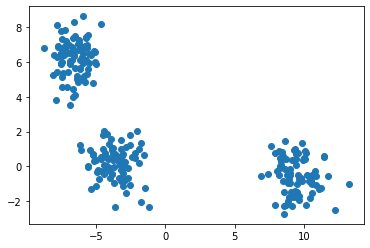

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
# we have drawn the scatter plot, we observe that there are 3 potential clustering, We will get the clusters using the K-Means algorithm.

In [8]:
X.shape

(250, 2)

In [9]:
Y.shape

(250,)

In [10]:
X

array([[-1.76119294e+00, -2.04353037e+00],
       [-2.89381065e+00,  2.42439643e-01],
       [ 8.54386912e+00, -2.27035198e+00],
       [ 9.02409355e+00, -1.68654217e+00],
       [-1.49886302e+00, -1.25619576e+00],
       [ 1.08845157e+01, -1.10016115e+00],
       [-2.37316268e+00,  5.36467295e-01],
       [ 1.07910939e+01, -2.89529479e-01],
       [ 8.39128487e+00,  7.96450581e-01],
       [ 9.59176637e+00, -7.56703449e-01],
       [-6.33874905e+00,  5.04823265e+00],
       [ 1.05378987e+01, -1.00877722e+00],
       [-5.03427436e+00,  3.42450170e-01],
       [ 9.49340064e+00, -1.45369416e+00],
       [ 9.42344811e+00,  4.41121029e-01],
       [ 7.64128203e+00,  1.18865245e+00],
       [-5.94889316e+00,  5.91289389e+00],
       [-5.02661669e+00, -1.16119294e+00],
       [-5.48012212e+00,  5.93300029e+00],
       [-3.20866531e+00,  2.99442489e-01],
       [-1.89861851e+00,  9.70819413e-01],
       [-6.15698111e+00,  6.11948052e+00],
       [ 8.20652431e+00,  8.59530947e-01],
       [ 6.

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss=[]
for i in range(2,10):
   km = KMeans(n_clusters=i)
   km.fit(X)
   wcss.append(km.inertia_)

### For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

In [72]:
wcss

[4249.291714564379,
 515.4252604473431,
 449.7959193990946,
 386.84021954176933,
 327.0804755131141,
 281.1028000735615,
 247.21260771583906,
 207.8503899771202]

## Elbow plot with different values of K

Text(0, 0.5, 'wcss')

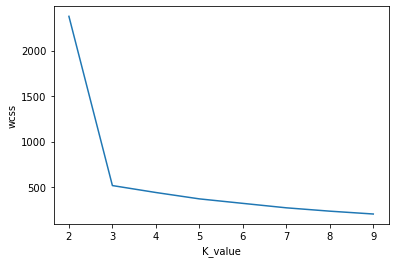

In [14]:
plt.plot(range(2,10),wcss)
plt.xlabel("K_value")
plt.ylabel("wcss")

## Making new model using K=3 as  we see from the above graph that elbow is seen at K=3

In [15]:
new_km=KMeans(n_clusters=3)

In [16]:
X_new=new_km.fit_predict(X)

In [17]:
X_new

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0,
       0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2,
       0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0,
       1, 1, 1, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1,
       2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2,
       0, 2, 0, 0, 1, 1, 0, 2])

### We got the different clusters as different classes in X_new as the result

#### We can see how well the algorithm classified  the different classes in the scatter  plot below

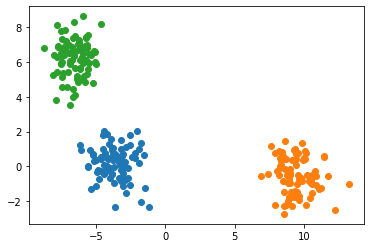

In [18]:
plt.scatter(X[X_new==0][:,0],X[X_new==0][:,1])
plt.scatter(X[X_new==1][:,0],X[X_new==1][:,1])
plt.scatter(X[X_new==2][:,0],X[X_new==2][:,1])
plt.show()
